# PSAR 用の足データの編集

In [22]:
import datetime

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from func.preprocs import prepOHLC, prepTick
from tech.psar import psarStepByStep

## データ準備

In [35]:
interval = '1m'
code = '8306'
dateStr = '20250129'

### OHLC データの読み込み

In [36]:
ohlcname = 'ohlc/ohlc_%s_%s_%s.csv' % (interval, code, dateStr)
df = pd.read_csv(ohlcname)
df_ohlc = prepOHLC(df)[['Open', 'High', 'Low', 'Close', 'Volume']]
df_ohlc

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-01-29 09:00:00,1975.0,1975.0,1964.0,1966.5,5899600.0
2025-01-29 09:01:00,1967.0,1973.0,1964.5,1966.5,871000.0
2025-01-29 09:02:00,1966.0,1971.5,1965.0,1969.0,622800.0
2025-01-29 09:03:00,1968.5,1974.0,1968.0,1970.5,667700.0
2025-01-29 09:04:00,1970.0,1971.5,1968.0,1968.5,314300.0
...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0


In [37]:
df_ohlc_1 = psarStepByStep(df_ohlc)
df_ohlc_1

,Open,High,Low,Close,Volume,Trend,EP,AF,PSAR,bull,bear
Datetime,,,,,,,,,,,
2025-01-29 09:00:00,1975.0,1975.0,1964.0,1966.5,5899600.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 09:01:00,1967.0,1973.0,1964.5,1966.5,871000.0,-1.0,1964.5,0.02,1964.500000,NaN,1964.5
2025-01-29 09:02:00,1966.0,1971.5,1965.0,1969.0,622800.0,1.0,1971.5,0.02,1964.500000,1964.500000,NaN
2025-01-29 09:03:00,1968.5,1974.0,1968.0,1970.5,667700.0,1.0,1974.0,0.04,1964.880000,1964.880000,NaN
2025-01-29 09:04:00,1970.0,1971.5,1968.0,1968.5,314300.0,1.0,1974.0,0.04,1965.244800,1965.244800,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1967.898053,1967.898053,NaN
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.186208,1968.186208,NaN
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.451312,1968.451312,NaN


### ティックデータの読み込み

In [38]:
tickname = 'tick/tick_%s_%s.csv' % (code, dateStr)
df = pd.read_csv(tickname)
df_tick = prepTick(df, dateStr)
df_tick

,Price
Datetime,
2025-01-29 09:00:00,1974.5
2025-01-29 09:00:01,1974.0
2025-01-29 09:00:04,1971.5
2025-01-29 09:00:06,1974.0
2025-01-29 09:00:08,1971.5
...,...
2025-01-29 15:24:53,1971.0
2025-01-29 15:24:54,1971.5
2025-01-29 15:24:56,1971.0


## プロット (1) ～ 通常の OHLC ～

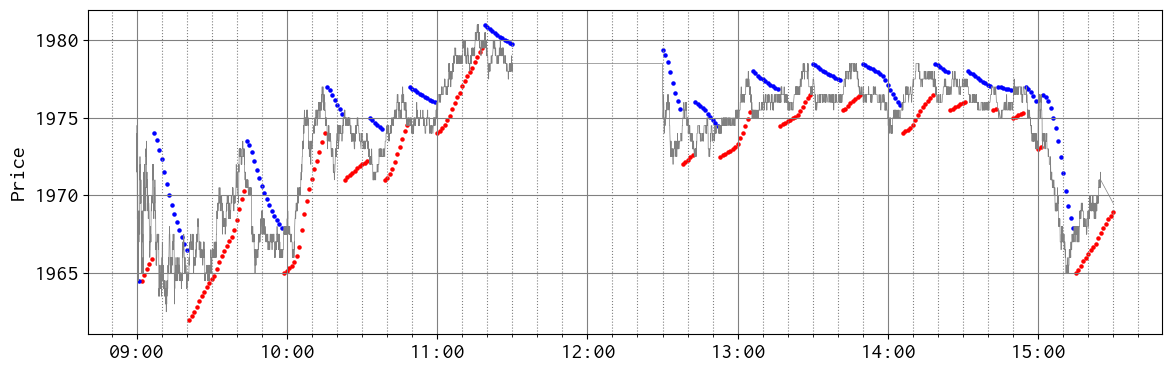

In [39]:
FONT_PATH = 'fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 4))

# ティックデータ
ax.plot(
    df_tick,
    linewidth=0.5,
    color='gray',
)
# PSAR
ax.scatter(
    df_ohlc_1.index,
    df_ohlc_1['bull'],
    s=5,
    c='red',
)
ax.scatter(
    df_ohlc_1.index,
    df_ohlc_1['bear'],
    s=5,
    c='blue',
)

ax.xaxis.set_major_formatter(
    mdates.DateFormatter('%H:%M')
)
ax.xaxis.set_minor_locator(mdates.MinuteLocator([10, 20, 30, 40, 50]))
ax.set_ylabel('Price')

ax.grid(visible=True, which='major', color='gray', linestyle='-')
ax.grid(visible=True, which='minor', color='gray', linestyle='dotted')

plt.tight_layout()
plt.savefig('study_009_1.png')
plt.show()

## 1 分足 + 2 分足

In [40]:
df_ohlc

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-01-29 09:00:00,1975.0,1975.0,1964.0,1966.5,5899600.0
2025-01-29 09:01:00,1967.0,1973.0,1964.5,1966.5,871000.0
2025-01-29 09:02:00,1966.0,1971.5,1965.0,1969.0,622800.0
2025-01-29 09:03:00,1968.5,1974.0,1968.0,1970.5,667700.0
2025-01-29 09:04:00,1970.0,1971.5,1968.0,1968.5,314300.0
...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0


In [41]:
dict_columns = {
    'Open': [],
    'High': [],
    'Low': [],
    'Close': [],
    'Volume': [],
}
df_ohlc_2 = pd.DataFrame.from_dict(dict_columns)
df_ohlc_2 = df_ohlc_2.astype(float)
rows = len(df_ohlc)

for r in range(rows):
    t = df_ohlc.iloc[r].name
    volume = df_ohlc.iloc[r]['Volume']
    if r == 0 or r == rows - 1 or volume == 0:
        p_open = df_ohlc.iloc[r]['Open']
        p_high = df_ohlc.iloc[r]['High']
        p_low = df_ohlc.iloc[r]['Low']
        p_close = df_ohlc.iloc[r]['Close']
    else:
        p_high_1 = df_ohlc.iloc[r - 1]['High']
        p_low_1 = df_ohlc.iloc[r - 1]['Low']
    
        p_open = df_ohlc.iloc[r]['Open']
        p_high = df_ohlc.iloc[r]['High']
        p_low = df_ohlc.iloc[r]['Low']
        p_close = df_ohlc.iloc[r]['Close']
    
        if p_high < p_high_1:
            p_high = p_high_1
        if p_low_1 < p_low:
            p_low = p_low_1
    
    df_ohlc_2.at[t, 'Open'] = p_open
    df_ohlc_2.at[t, 'High'] = p_high
    df_ohlc_2.at[t, 'Low'] = p_low
    df_ohlc_2.at[t, 'Close'] = p_close
    df_ohlc_2.at[t, 'Volume'] = volume

df_ohlc_2 = psarStepByStep(df_ohlc_2)
df_ohlc_2

,Open,High,Low,Close,Volume,Trend,EP,AF,PSAR,bull,bear
2025-01-29 09:00:00,1975.0,1975.0,1964.0,1966.5,5899600.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 09:01:00,1967.0,1975.0,1964.0,1966.5,871000.0,-1.0,1964.0,0.02,1964.000000,NaN,1964.0
2025-01-29 09:02:00,1966.0,1973.0,1964.5,1969.0,622800.0,1.0,1973.0,0.02,1964.000000,1964.000000,NaN
2025-01-29 09:03:00,1968.5,1974.0,1965.0,1970.5,667700.0,1.0,1974.0,0.04,1964.400000,1964.400000,NaN
2025-01-29 09:04:00,1970.0,1974.0,1968.0,1968.5,314300.0,1.0,1974.0,0.04,1964.784000,1964.784000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1967.898053,1967.898053,NaN
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.186208,1968.186208,NaN
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.451312,1968.451312,NaN
2025-01-29 15:29:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.695207,1968.695207,NaN


## プロット (2) ～ 1 分足 + 2 分足 ～

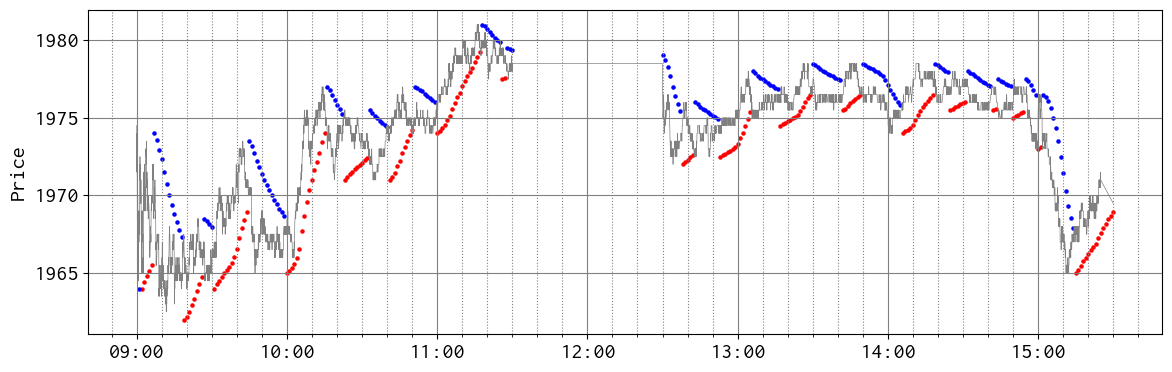

In [42]:
FONT_PATH = 'fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 4))

# ティックデータ
ax.plot(
    df_tick,
    linewidth=0.5,
    color='gray',
)
# PSAR
ax.scatter(
    df_ohlc_2.index,
    df_ohlc_2['bull'],
    s=5,
    c='red',
)
ax.scatter(
    df_ohlc_2.index,
    df_ohlc_2['bear'],
    s=5,
    c='blue',
)

ax.xaxis.set_major_formatter(
    mdates.DateFormatter('%H:%M')
)
ax.xaxis.set_minor_locator(mdates.MinuteLocator([10, 20, 30, 40, 50]))
ax.set_ylabel('Price')

ax.grid(visible=True, which='major', color='gray', linestyle='-')
ax.grid(visible=True, which='minor', color='gray', linestyle='dotted')

plt.tight_layout()
plt.savefig('study_009_2.png')
plt.show()

## 1 分足 + 3 分足

In [43]:
dict_columns = {
    'Open': [],
    'High': [],
    'Low': [],
    'Close': [],
    'Volume': [],
}
df_ohlc_3 = pd.DataFrame.from_dict(dict_columns)
df_ohlc_3 = df_ohlc_3.astype(float)
rows = len(df_ohlc)

for r in range(rows):
    t = df_ohlc.iloc[r].name
    volume = df_ohlc.iloc[r]['Volume']
    if r == 0 or r == rows - 1 or volume == 0:
        p_open = df_ohlc.iloc[r]['Open']
        p_high = df_ohlc.iloc[r]['High']
        p_low = df_ohlc.iloc[r]['Low']
        p_close = df_ohlc.iloc[r]['Close']
    elif r == 1:
        p_high_1 = df_ohlc.iloc[r - 1]['High']
        p_low_1 = df_ohlc.iloc[r - 1]['Low']
    
        p_open = df_ohlc.iloc[r]['Open']
        p_high = df_ohlc.iloc[r]['High']
        p_low = df_ohlc.iloc[r]['Low']
        p_close = df_ohlc.iloc[r]['Close']
    
        if p_high < p_high_1:
            p_high = p_high_1
        if p_low_1 < p_low:
            p_low = p_low_1
    else:
        p_high_1 = df_ohlc.iloc[r - 2]['High']
        p_low_1 = df_ohlc.iloc[r - 2]['Low']

        p_high_2 = df_ohlc.iloc[r - 1]['High']
        p_low_2 = df_ohlc.iloc[r - 1]['Low']

        p_high_3 = df_ohlc.iloc[r]['High']
        p_low_3 = df_ohlc.iloc[r]['Low']

        p_high = np.max([p_high_1, p_high_2, p_high_3])
        p_low = np.min([p_low_1, p_low_2, p_low_3])

        p_open = df_ohlc.iloc[r]['Open']
        p_close = df_ohlc.iloc[r]['Close']
    
    df_ohlc_3.at[t, 'Open'] = p_open
    df_ohlc_3.at[t, 'High'] = p_high
    df_ohlc_3.at[t, 'Low'] = p_low
    df_ohlc_3.at[t, 'Close'] = p_close
    df_ohlc_3.at[t, 'Volume'] = volume

df_ohlc_3 = psarStepByStep(df_ohlc_3)
df_ohlc_3

,Open,High,Low,Close,Volume,Trend,EP,AF,PSAR,bull,bear
2025-01-29 09:00:00,1975.0,1975.0,1964.0,1966.5,5899600.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 09:01:00,1967.0,1975.0,1964.0,1966.5,871000.0,-1.0,1964.0,0.02,1964.000000,NaN,1964.0
2025-01-29 09:02:00,1966.0,1975.0,1964.0,1969.0,622800.0,1.0,1975.0,0.02,1964.000000,1964.000000,NaN
2025-01-29 09:03:00,1968.5,1974.0,1964.5,1970.5,667700.0,1.0,1975.0,0.02,1964.220000,1964.220000,NaN
2025-01-29 09:04:00,1970.0,1974.0,1965.0,1968.5,314300.0,1.0,1975.0,0.02,1964.435600,1964.435600,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1967.898053,1967.898053,NaN
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.186208,1968.186208,NaN
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.451312,1968.451312,NaN
2025-01-29 15:29:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.695207,1968.695207,NaN


## プロット (3) ～ 1 分足 + 3 分足 ～

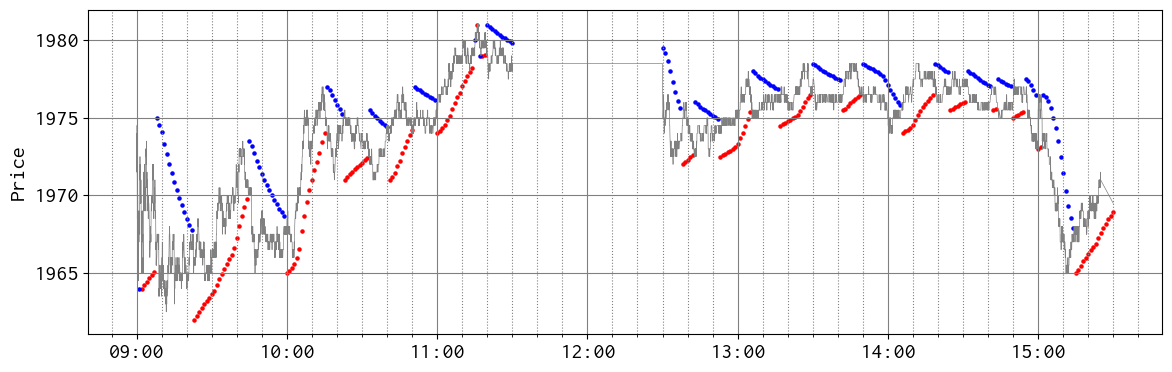

In [44]:
FONT_PATH = 'fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 4))

# ティックデータ
ax.plot(
    df_tick,
    linewidth=0.5,
    color='gray',
)
# PSAR
ax.scatter(
    df_ohlc_3.index,
    df_ohlc_3['bull'],
    s=5,
    c='red',
)
ax.scatter(
    df_ohlc_3.index,
    df_ohlc_3['bear'],
    s=5,
    c='blue',
)

ax.xaxis.set_major_formatter(
    mdates.DateFormatter('%H:%M')
)
ax.xaxis.set_minor_locator(mdates.MinuteLocator([10, 20, 30, 40, 50]))
ax.set_ylabel('Price')

ax.grid(visible=True, which='major', color='gray', linestyle='-')
ax.grid(visible=True, which='minor', color='gray', linestyle='dotted')

plt.tight_layout()
plt.savefig('study_009_3.png')
plt.show()

## 平均足

In [45]:
dict_columns = {
    'Open': [],
    'High': [],
    'Low': [],
    'Close': [],
    'Volume': [],
}
df_ohlc_4 = pd.DataFrame.from_dict(dict_columns)
df_ohlc_4 = df_ohlc_4.astype(float)
rows = len(df_ohlc)

for r in range(rows):
    t = df_ohlc.iloc[r].name
    volume = df_ohlc.iloc[r]['Volume']

    if r == 0:
        p_open = np.nan
        p_high = np.nan
        p_low = np.nan
        p_close = np.nan
    else:
        if r == 1:
            # 前日の平均足がないため、始値を下記値より算出
            # 始値=(前日の始値+前日の高値+前日の安値+前日の終値)/4
            p_open = (df_ohlc.iloc[r - 1]['Open'] + df_ohlc.iloc[r - 1]['High'] + df_ohlc.iloc[r - 1]['Low'] + df_ohlc.iloc[r - 1]['Close']) / 4
        else:
            # 始値=(前日の平均足の始値+前日の平均足の終値)/2
            p_open = (df_ohlc_4.iloc[r - 1]['Open'] + df_ohlc_4.iloc[r - 1]['Close']) / 2
        
        # 終値=(当日の始値+当日の高値+当日の安値+当日の終値)/4
        p_close = (df_ohlc.iloc[r]['Open'] + df_ohlc.iloc[r]['High'] + df_ohlc.iloc[r]['Low'] + df_ohlc.iloc[r]['Close']) / 4

        # 陰線：始値＞＝終値
        # 陽線：始値＜終値
        # 平均足の高値と安値は、当日の高値と安値を用いる。但し、
        # 平均足が陰線で当日の高値＜平均足の始値の場合、平均足の高値=平均足の始値とする。
        # 平均足が陽線で当日の安値＞平均足の始値の場合、平均足の安値=平均足の始値とする。
        if p_open >= p_close and df_ohlc.iloc[r]['High'] < p_open:
            p_high = p_open
        else:
            p_high = df_ohlc.iloc[r]['High']
        if p_open < p_close and df_ohlc.iloc[r]['Low'] > p_open:
            p_low = p_open
        else:
            p_low = df_ohlc.iloc[r]['Low']
    
    df_ohlc_4.at[t, 'Open'] = p_open
    df_ohlc_4.at[t, 'High'] = p_high
    df_ohlc_4.at[t, 'Low'] = p_low
    df_ohlc_4.at[t, 'Close'] = p_close
    df_ohlc_4.at[t, 'Volume'] = volume

# 最初の行は N/A なので除外
df_ohlc_4 = psarStepByStep(df_ohlc_4.iloc[1:rows])
df_ohlc_4

,Open,High,Low,Close,Volume,Trend,EP,AF,PSAR,bull,bear
2025-01-29 09:01:00,1970.125000,1973.0,1964.5,1967.750,871000.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 09:02:00,1968.937500,1971.5,1965.0,1967.875,622800.0,1.0,1971.5,0.02,1971.500000,1971.500000,NaN
2025-01-29 09:03:00,1968.406250,1974.0,1968.0,1970.250,667700.0,-1.0,1974.0,0.02,1971.500000,NaN,1971.5000
2025-01-29 09:04:00,1969.328125,1971.5,1968.0,1969.500,314300.0,-1.0,1968.0,0.04,1971.360000,NaN,1971.3600
2025-01-29 09:05:00,1969.414062,1970.0,1966.0,1968.500,545500.0,-1.0,1966.0,0.06,1971.038400,NaN,1971.0384
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29 15:26:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1967.898053,1967.898053,NaN
2025-01-29 15:27:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.186208,1968.186208,NaN
2025-01-29 15:28:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.451312,1968.451312,NaN
2025-01-29 15:29:00,NaN,NaN,NaN,NaN,0.0,1.0,1971.5,0.08,1968.695207,1968.695207,NaN


## プロット (4) ～ 平均足 ～

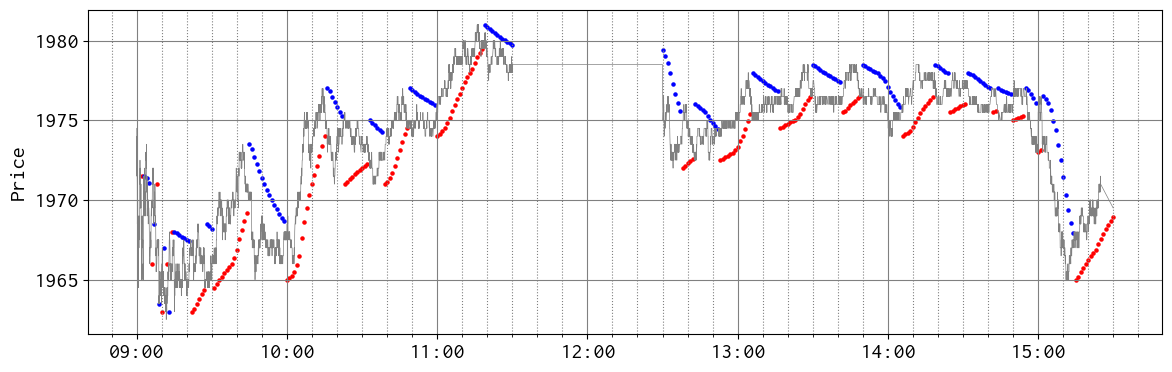

In [46]:
FONT_PATH = 'fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 4))

# ティックデータ
ax.plot(
    df_tick,
    linewidth=0.5,
    color='gray',
)
# PSAR
ax.scatter(
    df_ohlc_4.index,
    df_ohlc_4['bull'],
    s=5,
    c='red',
)
ax.scatter(
    df_ohlc_4.index,
    df_ohlc_4['bear'],
    s=5,
    c='blue',
)

ax.xaxis.set_major_formatter(
    mdates.DateFormatter('%H:%M')
)
ax.xaxis.set_minor_locator(mdates.MinuteLocator([10, 20, 30, 40, 50]))
ax.set_ylabel('Price')

ax.grid(visible=True, which='major', color='gray', linestyle='-')
ax.grid(visible=True, which='minor', color='gray', linestyle='dotted')

plt.tight_layout()
plt.savefig('study_009_4.png')
plt.show()